## Naive Bayes Classifier

* Naive Bayes is a collection of classification algorithms based on Bayes Theorem. 
* Basic explanation of Naive Bayes with examples: http://blog.aylien.com/naive-bayes-for-dummies-a-simple-explanation/
* This Naive Bayes tutorial is based on "Evaluating a Classification Model" post available at http://www.ritchieng.com/machine-learning-evaluate-classification-model/

## The Data

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

https://www.kaggle.com/uciml/pima-indians-diabetes-database/version/1#


In [1]:
# read the data into a Pandas DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv('pima_indians_diabetes.csv')
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# define X and y
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df['Outcome']

In [3]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [4]:
# train a logistic regression model on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate model
nb = GaussianNB()

# fit model
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# make class predictions for the testing set
#y_pred_class = nb.predict(X_test)
#y_pred_class

# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
# 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
# new_data = np.array([[0,126,94,0,0,50.6,0.201,20]])
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
new_pred = nb.predict(new_data)
new_pred



y_pred_class = nb.predict(X_test)
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [13]:
temp = pd.concat([X_test, y_test, pd.DataFrame(y_pred_class)], axis=1)
temp.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,0
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.7727272727272727


**Confusion matrix**: a table that describes the performance of a classification model

In [16]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[85 14]
 [21 34]]


|n = xxx     |Predicted = 0|Predicted = 1|
|------------|-------------|-------------|
|Actual = 0  |114          |16           |
|Actual = 1  |29           |33           |

**Basic terminology**

* True Positives (TP): we correctly predicted that they do have diabetes: 33
* True Negatives (TN): we correctly predicted that they don't have diabetes: 114
* False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error"): 16
* False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error"): 29

In [17]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[85 14]
 [21 34]]


In [29]:
# Classification Accuracy: Overall, how often is the classifier correct?

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.7727272727272727
0.7727272727272727


In [19]:
# Classification Error: Overall, how often is the classifier incorrect?

# Also known as "Misclassification Rate"
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.22727272727272727
0.2272727272727273


**Sensitivity**: When the actual value is positive, how often is the prediction correct?

* Something we want to maximize
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "True Positive Rate" or "Recall"
* TP / all positive
    * all positive = TP + FN

In [20]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.6181818181818182
0.6181818181818182


**Specificity**: When the actual value is negative, how often is the prediction correct?

* Something we want to maximize
* How "specific" (or "selective") is the classifier in predicting positive instances?
* TN / all negative
    * all negative = TN + FP

In [21]:
specificity = TN / (TN + FP)

print(specificity)

0.8585858585858586


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [22]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1414141414141414
0.14141414141414144


**Precision**: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [23]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.7083333333333334
0.7083333333333334


**Receiver Operating Characteristic (ROC) Curve**

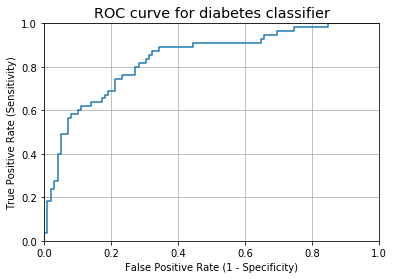

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt



# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob

y_pred_prob = nb.predict_proba(X_test)[:, 1]

# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**AUC**: the percentage of the ROC plot that is underneath the curve:
* AUC is useful as a single number summary of classifier performance
* Higher value = better classifier
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation

In [25]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8359963269054177
